# Neighbor Overlap and PCA

It's common to run PCA on data before applying dimensionality reduction. Sometimes this is for
speed purposes, in which case the assumption is that distances are hot hugely distorted by the
projection. In other cases, it's considered a denoising process, in which case you would want the
distances to distort and return a different set of neighbors than otherwise.

It can be useful to know what regime PCA is working in. The `neighbors.pcaoverlap` module contains
this fairly specific code.

The `pca_nn_overlap` function will load a dataset, calculate nearest neighbors overlap with the raw
data at a variety of components and then show a line plot showing how the overlap changes as the
components increase.

There will be three curves shown by default:

* blue: overlap with the 150 nearest neighbors.
* orange: overlap with the 15 nearest neighbors.
* green: overlap of the 150 nearest neighbors in the raw data, with the 15 nearest neighbors in the
PCA space.

That last one may seem a bit odd. The idea I wanted to explore here is if PCA is denoising the data,
then you are probably hoping for different neighbors than what you get in the raw data. If not, then
most downstream dimensionality reduction methods will show the same output: the actual distances
usually have a fairly small effect on the output, it's the identity of the neighbors that seems to
matter. In that case, are the new top neighbors in PCA lurking in the original raw data, but 
further down the list and PCA's changes to the distances "rescue" and rerank neighbors that are 
close anyway? If that was the case, then maybe rather than do PCA, you could imagine a process
whereby you create a k = 150 nearest neighbor graph with the raw data, and then construct a
"denoised" k = 15 nearest neighbor graph that resembles the PCA result by looking at properties of
the raw graph itself and modifying edges e.g. converting it to mutual nearest neighbor graph,
reducing the effect of hubs etc. This would be a more general procedure for data where PCA doesn't
make sense, and keep things conceptually in the world of graphs, nodes and edges.

In [1]:
from drnb.neighbors.pcaoverlap import pca_nn_overlap

`coil20` is quite a small (but wide) image dataset, which I suspect can be well represented by very
few components.

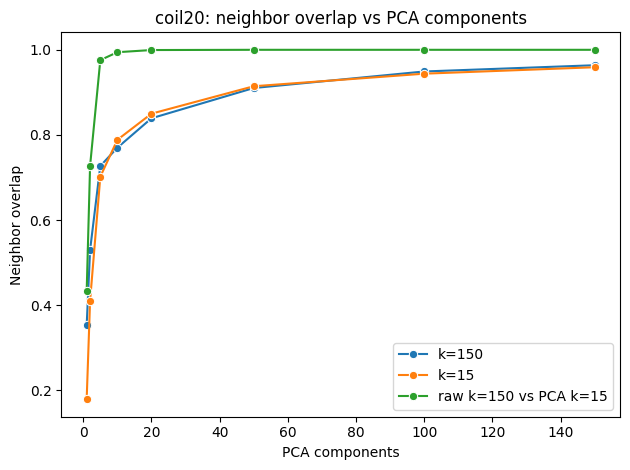

,n_components,overlap_big_big,overlap_small_small,overlap_big_small
0,1,0.352347,0.178843,0.432222
1,2,0.529537,0.410370,0.727269
2,5,0.726986,0.701806,0.975741
3,10,0.769940,0.788426,0.994352
4,20,0.839069,0.849907,0.999444
5,50,0.910204,0.914352,1.000000
6,100,0.949060,0.943889,1.000000
7,150,0.963736,0.959028,1.000000


In [3]:
pca_nn_overlap("coil20")

50 components preserves 90% of the nearest neighbors. This is similar to the t-SNE paper which used
this dataset with 30 components.

Let's look at MNIST next.

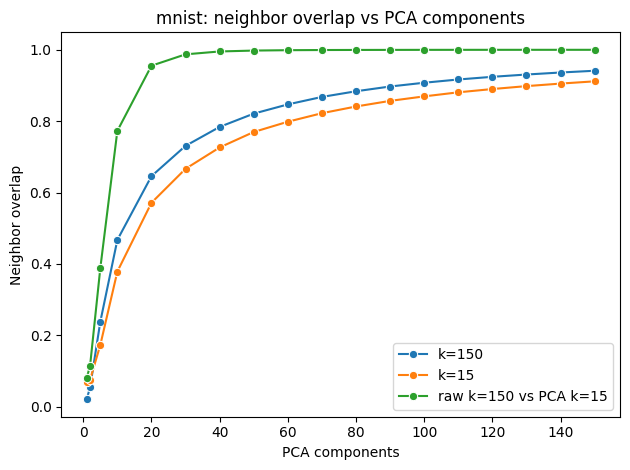

,n_components,overlap_big_big,overlap_small_small,overlap_big_small
0,1,0.020699,0.068224,0.079665
1,2,0.054008,0.075599,0.114861
2,5,0.237893,0.172753,0.388023
3,10,0.467216,0.378479,0.772810
4,20,0.645825,0.571203,0.955367
5,30,0.730768,0.666457,0.987248
6,40,0.783896,0.726283,0.995326
7,50,0.821097,0.769630,0.997818
8,60,0.846926,0.798389,0.998876
9,70,0.867878,0.822301,0.999345


In [4]:
pca_nn_overlap(
    "mnist",
    components=[
        1,
        2,
        5,
        10,
        20,
        30,
        40,
        50,
        60,
        70,
        80,
        90,
        100,
        110,
        120,
        130,
        140,
        150,
    ],
)

The image datasets seem quite well compressed with PCA. But in the world of transcriptomics, PCA is
often used for denoising. So we would expect to see very different curves there. `macosko2015` 
definitely gives different UMAP results between PCA with 50 components and keeping all 3000 HVGs:

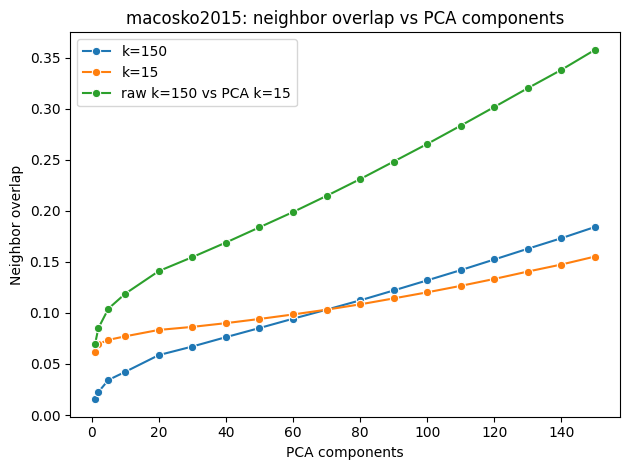

,n_components,overlap_big_big,overlap_small_small,overlap_big_small
0,1,0.015468,0.061674,0.069398
1,2,0.022593,0.069592,0.085156
2,5,0.034366,0.073591,0.104234
3,10,0.042301,0.077093,0.118803
4,20,0.058700,0.083341,0.140964
5,30,0.067105,0.086330,0.154630
6,40,0.076256,0.089981,0.168912
7,50,0.085200,0.094080,0.183835
8,60,0.094314,0.098481,0.198777
9,70,0.103176,0.103175,0.214603


In [5]:
pca_nn_overlap(
    "macosko2015",
    components=[
        1,
        2,
        5,
        10,
        20,
        30,
        40,
        50,
        60,
        70,
        80,
        90,
        100,
        110,
        120,
        130,
        140,
        150,
    ],
)

150 components is nowhere near reproducing the neighbors from the raw data, but that's how the
scRNA-seq folks like it. Let's go even further out.

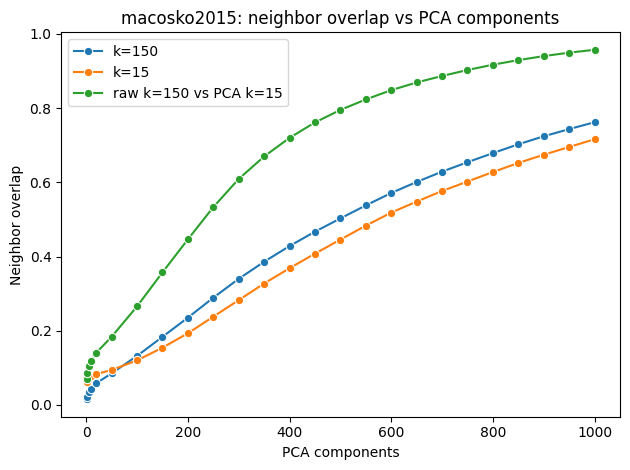

,n_components,overlap_big_big,overlap_small_small,overlap_big_small
0,1,0.015469,0.061526,0.069189
1,2,0.022593,0.069592,0.085156
2,5,0.034366,0.073591,0.104230
3,10,0.042301,0.077090,0.118803
4,20,0.058706,0.083385,0.141000
5,50,0.085205,0.094135,0.183696
6,100,0.132077,0.120150,0.265573
7,150,0.183616,0.154379,0.357180
8,200,0.235233,0.193196,0.446155
9,250,0.289014,0.237849,0.533006


In [6]:
pca_nn_overlap(
    "macosko2015",
    components=[
        1,
        2,
        5,
        10,
        20,
        50,
        100,
        150,
        200,
        250,
        300,
        350,
        400,
        450,
        500,
        550,
        600,
        650,
        700,
        750,
        800,
        850,
        900,
        950,
        1000,
    ],
)

You would need a rather large number of components (800) to even find 90% of the top 15 PCA nearest
neighbors in the raw data's 150 neighbors. That's not a typical number that is used in most
scRNA-seq workflows. So it looks like the idea that you can find the PCA neighbors hiding in the
raw neighbor graph is not well-attested.

Here's another transcriptomics dataset:

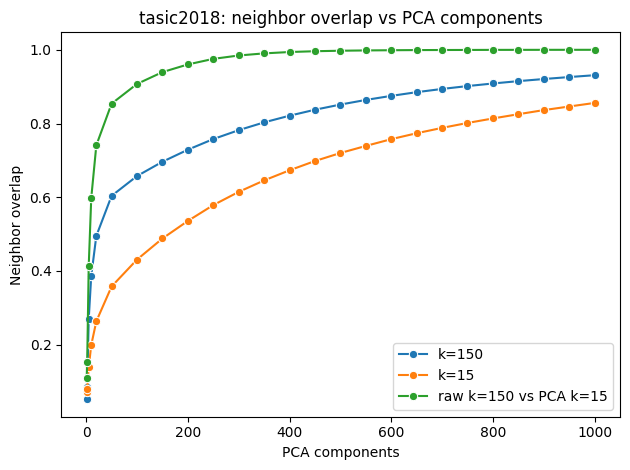

,n_components,overlap_big_big,overlap_small_small,overlap_big_small
0,1,0.051935,0.071805,0.109784
1,2,0.086396,0.079976,0.152293
2,5,0.268876,0.138318,0.412599
3,10,0.387128,0.199099,0.598094
4,20,0.495075,0.263460,0.741046
5,50,0.603686,0.357851,0.853827
6,100,0.657465,0.430873,0.907355
7,150,0.696255,0.488059,0.939437
8,200,0.728930,0.535667,0.960250
9,250,0.757809,0.578653,0.975376


In [7]:
pca_nn_overlap(
    "tasic2018",
    components=[
        1,
        2,
        5,
        10,
        20,
        50,
        100,
        150,
        200,
        250,
        300,
        350,
        400,
        450,
        500,
        550,
        600,
        650,
        700,
        750,
        800,
        850,
        900,
        950,
        1000,
    ],
)

You do get more of the neighbors earlier in this dataset, but it's still closer to the behavior of
`macosko2015` than `coil20`.

Text datasets in their TF-IDF form resemble transcriptomics workflows surprisingly closely. So let's
look at the 20 Newsgroups dataset. In this case, we have already done truncated SVD on the data to
get to 2500 components, so doing PCA all over again is a bit redundant and we are considering the
full 2500 component model to be the "raw data", but with those caveats in mind let's see how it
looks.

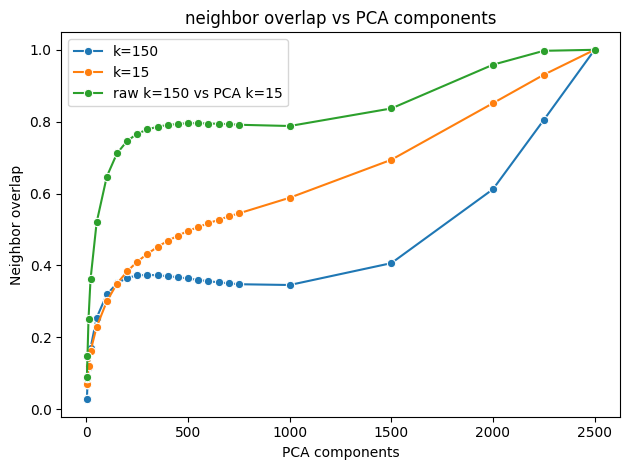

In [13]:
from drnb.io.dataset import read_data
from drnb.neighbors.pcaoverlap import create_overlap_curve, plot_overlap_curve
from drnb.neighbors.store import read_neighbors

ng20 = read_data(dataset="ng20")

raw_neighbors = read_neighbors(
    name="ng20",
    n_neighbors=150,
    exact=True,
    return_distance=False,
)

curve = create_overlap_curve(
    raw_neighbors.idx,
    ng20,
    n_neighbors=150,
    n_neighbors_small=15,
    components=[
        1,
        2,
        5,
        10,
        20,
        50,
        100,
        150,
        200,
        250,
        300,
        350,
        400,
        450,
        500,
        550,
        600,
        650,
        700,
        750,
        1000,
        1500,
        2000,
        2250,
        2500,
    ],
)

plot_overlap_curve(
    curve,
    n_neighbors=150,
    n_neighbors_small=15,
)

Rather unexpected behavior here with the early plateau and late rise.